In [11]:
from typing_extensions import TypedDict
from typing import Literal


class TypedDictState(TypedDict):
    name: str
    game: Literal["cricket", "badminton"]

In [22]:
def play_game(state: TypedDictState):
    print("---------- play game node has been called ----------")
    return {"name": state["name"] + " wants to play."}


def cricket(state: TypedDictState):
    print("---------- cricket node has been called ----------")
    return {"name": state["name"] + " cricket", "game": "cricket"}

def badminton(state: TypedDictState):
    print("---------- badminton node has been called ----------")
    return {"name": state["name"] + " badminton", "game": "badminton"}



In [23]:
def decide_play(state: TypedDictState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    return "badminton"

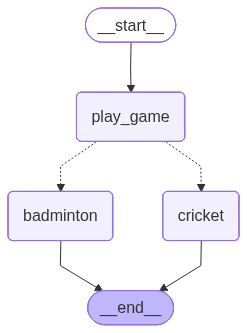

In [24]:
import random
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END



state_builder = StateGraph(TypedDictState)
state_builder.add_node("play_game", play_game)
state_builder.add_node("cricket", cricket)
state_builder.add_node("badminton", badminton)

state_builder.add_edge(START, "play_game")
state_builder.add_conditional_edges("play_game", decide_play)
state_builder.add_edge("cricket", END)
state_builder.add_edge("badminton", END)

graph =  state_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [27]:
graph.invoke({"name": "Alice"})

---------- play game node has been called ----------
---------- cricket node has been called ----------


{'name': 'Alice wants to play. cricket', 'game': 'cricket'}

#### Dataclass

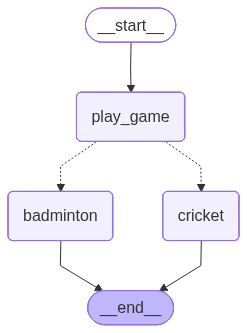

In [42]:
from dataclasses import dataclass
from typing import Literal
import random

from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


@dataclass
class DataclassState:
    name: str
    game: Literal["cricket", "badminton"]


def play_game_dataclass(state: DataclassState):
    print("---------- play game node has been called ----------")
    return DataclassState(
        name=state.name + " wants to play.",
        game=state.game
    )


def cricket_dataclass(state: DataclassState):
    print("---------- cricket node has been called ----------")
    return DataclassState(
        name=state.name + " cricket",
        game="cricket"
    )


def badminton_dataclass(state: DataclassState):
    print("---------- badminton node has been called ----------")
    return DataclassState(
        name=state.name + " badminton",
        game="badminton"
    )


def decide_play_dataclass(state: DataclassState) -> Literal["cricket", "badminton"]:
    if random.random() < 0.5:
        return "cricket"
    return "badminton"


# Build graph
state_builder_dataclass = StateGraph(DataclassState)

state_builder_dataclass.add_node("play_game", play_game_dataclass)
state_builder_dataclass.add_node("cricket", cricket_dataclass)
state_builder_dataclass.add_node("badminton", badminton_dataclass)

state_builder_dataclass.add_edge(START, "play_game")

# Map condition outputs explicitly to nodes
state_builder_dataclass.add_conditional_edges(
    "play_game",
    decide_play_dataclass,
    {
        "cricket": "cricket",
        "badminton": "badminton",
    },
)

state_builder_dataclass.add_edge("cricket", END)
state_builder_dataclass.add_edge("badminton", END)

graph_dataclass = state_builder_dataclass.compile()

display(Image(graph_dataclass.get_graph().draw_mermaid_png()))

In [43]:
# Invoke
result = graph_dataclass.invoke(
    DataclassState(name="Alice", game="cricket")
)

print(result)


---------- play game node has been called ----------
---------- badminton node has been called ----------
{'name': 'Alice wants to play. badminton', 'game': 'badminton'}
